In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('../../2nd-Comp-Data/train.csv')
test = pd.read_csv('../../2nd-Comp-Data/test.csv')
testOriginal = pd.read_csv('../../2nd-Comp-Data/test.csv')

In [3]:
train.shape

(181507, 272)

In [4]:
test.drop('row ID', axis=1, inplace=True)

<h3>SubArea Removal<h3>

In [5]:
test.drop('sub_area', axis=1, inplace=True)
train.drop('sub_area', axis=1, inplace=True)

<h1>Categorical To Numerical<h1>

<h3>OneHot<h3>

In [6]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

<h3>Label<h3>

In [7]:
# categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
# print("Train: Categorical columns:", categorical_columns)

# label_encoder = LabelEncoder()

# for column in categorical_columns:
#     train[column] = label_encoder.fit_transform(train[column])

# categorical_columns_test = test.select_dtypes(include=['object']).columns.tolist()
# print("Test: Categorical columns:", categorical_columns_test)

# label_encoder = LabelEncoder()

# for column in categorical_columns_test:
#     test[column] = label_encoder.fit_transform(test[column])

<h1>Scaling<h1>

In [8]:
# def check_scaling_needed(dataframe, threshold=5):
#     """
#     Identify columns in a pandas DataFrame that may require scaling.

#     Parameters:
#     - dataframe: pandas DataFrame
#     - threshold: Range threshold to determine if a column requires scaling (default is 5)

#     Returns:
#     - List of tuples containing (column_name, range_value) for columns that may require scaling.
#     """
#     scaling_needed_columns = []

#     for column in dataframe.columns:
#         if dataframe[column].dtype in ['int64', 'float64']:
#             column_range = dataframe[column].max() - dataframe[column].min()
#             if column_range > threshold:
#                 scaling_needed_columns.append((column, column_range))

#     return scaling_needed_columns

# scaling_needed_columns = check_scaling_needed(train)

# if not scaling_needed_columns:
#     print("No columns require scaling.")
# else:
#     print("Columns that may require scaling:")
#     for column, column_range in scaling_needed_columns:
#         print(f"{column}: Range = {column_range}")


In [9]:
# scaling_needed_columns = check_scaling_needed(train)
# scaler = MinMaxScaler()

# for column, _ in scaling_needed_columns:
#     if train[column].dtype in ['int64', 'float64']:
#         train[column] = scaler.fit_transform(train[[column]])

<h1>Normalization<h1>

In [10]:
# def find_skewed_columns(dataframe, threshold=0.5):
#     """
#     Identify skewed columns in a pandas DataFrame.

#     Parameters:
#     - dataframe: pandas DataFrame
#     - threshold: Skewness threshold to determine if a column is skewed (default is 0.5)

#     Returns:
#     - List of tuples containing (column_name, skewness_value) for skewed columns.
#     """
#     skewed_columns = []
    
#     for column in dataframe.columns:
#         if dataframe[column].dtype in ['int64', 'float64']:
#             skewness = skew(dataframe[column])
#             if abs(skewness) > threshold:
#                 skewed_columns.append((column, skewness))
    
#     return skewed_columns

# skewed_columns = find_skewed_columns(train)

# if not skewed_columns:
#     print("No skewed columns found.")
# else:
#     print("Skewed columns:")
#     for column, skewness in skewed_columns:
#         print(f"{column}: Skewness = {skewness}")

In [11]:
# for column, _ in skewed_columns:
#     if train[column].dtype in ['int64', 'float64']:
#         train[column] = train[column].apply(lambda x: 1 if x == 0 else np.log(x))

<h1>Working<h1>

In [12]:
X = train.loc[:, train.columns != 'price_doc']
y = train[['price_doc']]

In [13]:
X.shape

(181507, 287)

In [14]:
test.shape

(77789, 287)

<h3>PCA<h3> 
<h5><i>Remember to set X2 & test2<i><h5>

In [15]:
# X.shape

In [16]:
# test.shape

In [17]:
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(X)
# X2 = pd.DataFrame(data = principalComponents)

# pca2 = PCA(n_components=20)
# principalComponents = pca2.fit_transform(test)
# test2 = pd.DataFrame(data = principalComponents)

In [18]:
# #plot an elbow graph to find the optimal number of components
# import matplotlib.pyplot as plt
# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')

In [19]:
# ols_reg = LinearRegression()
# sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=5)
# sfs.fit(X, y)
# print(sfs.get_feature_names_out())

In [20]:
# X = X[['full_sq', 'mosque_count_500', 'leisure_count_500', 'cafe_count_1000_price_high', 'leisure_count_1000']]
# test = test[['full_sq', 'mosque_count_500', 'leisure_count_500', 'cafe_count_1000_price_high', 'leisure_count_1000']]

<h1>Feature Importance<h1>

Feature: 0, Score: 952.95224
Feature: 1, Score: 290.01412
Feature: 2, Score: 61106.39325
Feature: 3, Score: 0.00084
Feature: 4, Score: 3.54503
Feature: 5, Score: 448886.27176
Feature: 6, Score: -107868.81970
Feature: 7, Score: 80.52946
Feature: 8, Score: 125917.86018
Feature: 9, Score: -37.11222
Feature: 10, Score: 23054.81118
Feature: 11, Score: 1088070.21973
Feature: 12, Score: 169302.58063
Feature: 13, Score: 312970.33038
Feature: 14, Score: 13129.94495
Feature: 15, Score: -45430.12752
Feature: 16, Score: -1496.01322
Feature: 17, Score: -25659.34240
Feature: 18, Score: 5132.98169
Feature: 19, Score: -0.00496
Feature: 20, Score: 1.99733
Feature: 21, Score: 0.74503
Feature: 22, Score: 4.46075
Feature: 23, Score: -10.68996
Feature: 24, Score: 60.62037
Feature: 25, Score: 1.52002
Feature: 26, Score: -9.97482
Feature: 27, Score: -7.02796
Feature: 28, Score: 7.70234
Feature: 29, Score: 51.40941
Feature: 30, Score: 28.72281
Feature: 31, Score: 0.00336
Feature: 32, Score: 21.69726
Feature: 

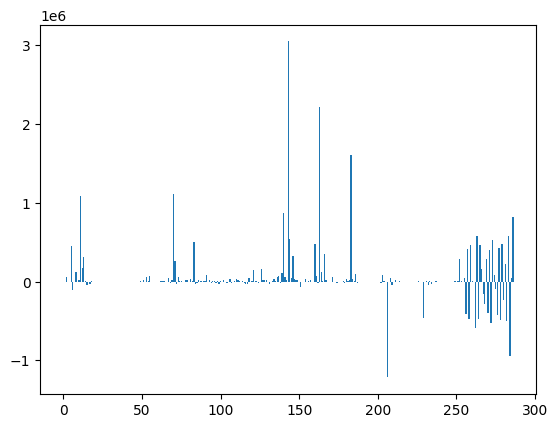

In [21]:
#give me code for feature importance using linear regression
model = LinearRegression()
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# drop features with low importance
threshold = 40000  # Adjust the threshold as needed
selected_features = [feature for feature, score in zip(X.columns, importance) if score >= threshold]
print(len(selected_features))
X = X[selected_features]
test = test[selected_features]

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<h1>Forward Feature Selection<h1>

In [22]:
# ols_reg = LinearRegression()
# sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=15)
# sfs.fit(X, y)
# print(sfs.get_feature_names_out())

In [23]:
# X2 = X[['full_sq', 'mosque_count_500', 'leisure_count_500', 'cafe_count_1000_price_high', 'leisure_count_1000']]
# test2 = test[['full_sq', 'mosque_count_500', 'leisure_count_500', 'cafe_count_1000_price_high', 'leisure_count_1000']]

<h1>P-Value Selection<h1>

In [24]:
# def find_significant_columns(df, target_variable_name):
#     # Initialize lists to store column names and corresponding p-values
#     significant_columns = []
#     p_values = []

#     # Loop through each column in the DataFrame
#     for column in df.columns:
#         # Skip the target variable itself
#         if column == target_variable_name:
#             continue
        
#         # Add a constant term for the intercept
#         X = sm.add_constant(df[column])
        
#         # Fit the linear regression model
#         model = sm.OLS(df[target_variable_name], X).fit()
        
#         # Get the p-value for the coefficient of the predictor variable
#         p_value = model.pvalues[1]
        
#         # Print information about the current column
#         print(f"{column}: p-value = {p_value}")
        
#         # Check if the p-value is less than or equal to 0.05
#         if p_value <= 0.05:
#             significant_columns.append(column)
#             p_values.append(p_value)

#     # Print total significant columns
#     print("\nTotal columns with p-value <= 0.05:", len(significant_columns))
    
#     # Print names of significant columns
#     print("\nColumns with p-value <= 0.05:", significant_columns)
    
#     # Create a new DataFrame with only the significant columns
#     df_significant = df[significant_columns]
    
#     return df_significant

# # Example usage:
# target_variable_name = 'price_doc'
# X2 = find_significant_columns(train, target_variable_name)
# print("\nDataFrame with significant columns:")
# print(X2)

# test2 = test[X2.columns]

# X = X.astype(float)
# X = sm.add_constant(X)
# mod = sm.OLS(y, X)
# res = mod.fit()
# print(res.summary())

In [25]:
# X3 = X

# def find_significant_columns(X, y):
#     # Convert the entire DataFrame to float
#     X = X.astype(float)

#     significant_columns = []

#     for column in X.columns:
#         if X[column].dtype == float:  # Only consider float columns
#             X_with_constant = sm.add_constant(X[column])
#             model = sm.OLS(y, X_with_constant).fit()
#             p_value = model.pvalues[1]  # Extract the p-value for the independent variable

#             if p_value <= 0.05:
#                 significant_columns.append(column)
#                 print(f"{column}: p-value = {p_value:.4f}")

#     print("\nTotal columns with p-value <= 0.05:", len(significant_columns))

#     # Create a new DataFrame with only significant columns
#     significant_df = X[significant_columns]

#     return significant_df

# X2 = find_significant_columns(X, y)
# print("\nDataFrame with significant columns:")
# print(X2)

# # print columns in X but not in X2
# print("\nColumns in X but not in X2:")
# print(set(X3.columns) - set(X2.columns))

# test2 = test[X2.columns]

In [26]:
# # print columns in X but not in X2
# print("\nColumns in X but not in X2:")
# print(set(X3.columns) - set(X2.columns))

In [27]:
# # X = X.astype(float)
# # X = sm.add_constant(X)
# # mod = sm.OLS(y, X)
# # res = mod.fit()
# # print(res.summary())

# X = X.astype(float)
# X = sm.add_constant(X)
# mod = sm.OLS(y, X)
# res = mod.fit()

# file_name = "output_summary.txt"

# with open(file_name, 'w') as file:
#     print(res.summary(), file=file)

# print(f"Summary saved to {file_name}")

In [28]:
# import pandas as pd

# def find_significant_columns(file_path):
#     # Read the file into a DataFrame
#     df = pd.read_table(file_path, skiprows=63)  # Skip the initial rows until the column names

#     # Print column names for inspection
#     print("Column Names:")
#     print(df.columns)

#     # Replace 'P>|t|' with the correct column name
#     # Extract the column names and p-values
#     column_names = df.columns
#     p_values = df['Replace_With_Correct_Column_Name']

#     # Find columns where p < 0.05
#     significant_columns = column_names[p_values < 0.05]

#     return significant_columns

# # Replace 'output_summary.txt' with the actual file path
# file_path = 'output_summary.txt'
# significant_columns = find_significant_columns(file_path)

# # Print or use the significant columns as needed
# print("Significant Columns:")
# print(significant_columns)


<h1> Poly Interaction NOT ONNNNNNNNN<h1>

In [29]:
poly = PolynomialFeatures(2)#, interaction_only=True)
X2 = poly.fit_transform(X)
test2 = poly.fit_transform(test)

<h1>Applying Model<h1>

In [30]:
X2.shape

(181507, 1485)

In [31]:
test2.shape

(77789, 1485)

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
# reg2 = LinearRegression().fit(X_train, y_train)
# y_pred = reg2.predict(X_test)
# print("LR: R2 = %.4f and MSE = %.2f" % (reg2.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

In [34]:
# reg2 = LinearRegression().fit(X_train, y_train)
# y_pred = reg2.predict(X_test)
# print("LR: R2 = %.4f and MSE = %.2f" % (reg2.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

In [35]:
reg2 = LinearRegression().fit(X2, y)
print(reg2.coef_)
print(reg2.intercept_)
y_pred = reg2.predict(test2)

[[ 8.40320198e+08  2.26845819e+05  5.11978843e+06 ... -6.37063078e+13
   0.00000000e+00  2.54933654e+13]]
[-8.38259501e+08]


In [36]:
result_df = pd.DataFrame({'row ID': testOriginal['row ID'], 'price_doc': y_pred.flatten()})
result_df.to_csv('Day4.5.csv', index=False)